In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import random as rng
%matplotlib inline

## Setup the system

Define the Hamiltonian of the system

In [2]:
def sigmax_N(i, N):
    op_list = [qeye(2)]*N
    op_list[i] = sigmax()
    return tensor(op_list)

def sigmay_N(i, N):
    op_list = [qeye(2)]*N
    op_list[i] = sigmay()
    return tensor(op_list)

def sigmaz_N(i, N):
    op_list = [qeye(2)]*N
    op_list[i] = sigmaz()
    return tensor(op_list)

def H(Jx, B, D):
    N = len(D)

    #Hamiltonian - Energy splitting & disordered
    H = 0
    for i in range(N):
        H += (B[i]+D[i])*sigmaz_N(i,N)
    #interaction terms
    for i in range(N):
        for j in range(N):
            H += 0.5*Jx[i][j]*sigmax_N(i, N)*sigmax_N(j, N)
    return H


Define the normalized Hamming distance operator.

In [3]:
def D_t(N):
    Dt = 0.5
    for i in range(N):
        Dt -= 1/(2*N)*(-1)**i*sigmaz_N(i, N)
    return Dt
    

Setup the initial state:

In [4]:
def Neel_state(N):
    state_list = []
    for i in range(N):
        state_list.append(basis(2,i%2))
    return tensor(state_list)

Generate the disordered term:

In [5]:
def disorder(W, N):
    W_array = []
    for i in range(N):
        W_array.append(rng.uniform(-W, W))
    return W_array

Generate the interaction graph:

In [6]:
def power_law(N, alpha, geometry):
    J = np.zeros([N,N])
    if geometry == "linear":
        for i in range(N):
            for j in range(N):
                if i!=j:
                    J[i][j] = abs(i-j)**alpha
    elif geometry == "ring":
        for i in range(N):
            for j in range(N):
                if i!=j:
                    distance = abs(j-i) if abs(j-i)<N else N-abs(j-i)
                    J[i][j] = distance**alpha
    return J

In [7]:
def checkerboard(N, n, geometry):
    J = np.zeros([N,N])
    if geometry == 'linear':
        for i in range(N):
            for j in range(N):
                if i!=j:
                    if (i-j)%n == 0:
                        J[i,j] = 1
    elif geometry == 'ring':
        for i in range(N):
            for j in range(N):
                if i!=j:
                    distance = abs(j-i) if abs(j-i)<N else N-abs(j-i)
                    if distance%n == 0:
                        J[i,j] = 1
    return J

In [8]:
def neighbor(N, n, geometry):
    J = np.zeros([N,N])
    if geometry == 'linear':
        for i in range(N):
            for j in range(N):
                if i!=j:
                    if abs(i-j)==n:
                        J[i][j] = 1
    elif geometry == 'ring':
        for i in range(N):
            for j in range(N):
                if i!=j:
                    distance = abs(j-i) if abs(j-i)<N else N-abs(j-i)
                    if distance == n:
                        J[i,j] = 1
    return J

### 1D Linear Chain

Dynamics simulation

In [ ]:
N=5
J = power_law(N, 0, 'linear')
W = disorder(200, N)
B = np.zeros(N)
Hamiltonian = H(J, B, W)
initial_state = Neel_state(N)
sz = []
times = np.linspace(0,50,101)
for i in range(N):
    sz.append(sigmaz_N(i,N))

result = mesolve(Hamiltonian,initial_state,times,[],sz)

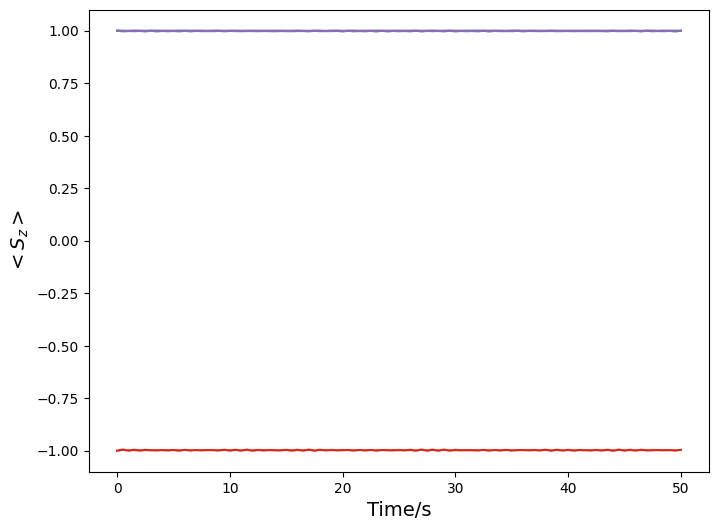

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(times, result.expect[i], label=f'Spin {i+1}')

plt.xlabel('Time/s',fontsize=14)
plt.ylabel('$<S_z>$',fontsize=14)
plt.show()

In [48]:
N=5
J = power_law(N, 2, 'linear')
W = disorder(1, N)
B = np.zeros(N)
Hamiltonian = H(J, B, W)
initial_state = Neel_state(N)
sz = []
times = np.linspace(0,101,51)
for i in range(N):
    sz.append(sigmaz_N(i,N))

result = mesolve(Hamiltonian,initial_state,times,[],sz)

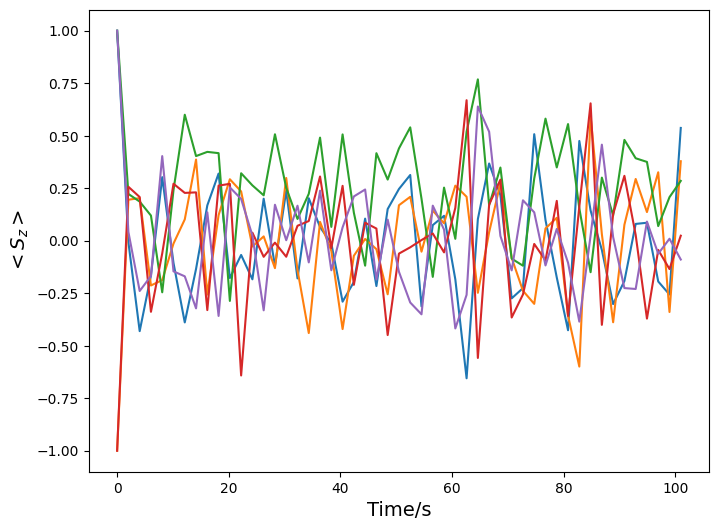

In [49]:
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(times, result.expect[i], label=f'Spin {i+1}')

plt.xlabel('Time/s',fontsize=14)
plt.ylabel('$<S_z>$',fontsize=14)
#plt.legend()
#plt.savefig('alpha1_w50.png')
plt.show()

In [62]:
N=5
J = power_law(N, 1, 'linear')
W = disorder(50, N)
B = np.zeros(N)
Hamiltonian = H(J, B, W)
initial_state = Neel_state(N)
sz = []
times = np.linspace(0,201,51)
for i in range(N):
    sz.append(sigmaz_N(i,N))

result = mesolve(Hamiltonian,initial_state,times,[],sz)

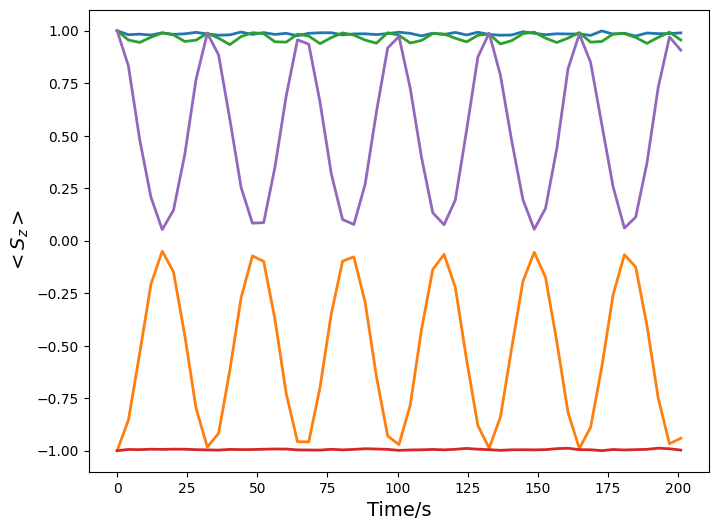

In [63]:
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(times, result.expect[i], label=f'Spin {i+1}',linewidth=2)

plt.xlabel('Time/s',fontsize=14)
plt.ylabel('$<S_z>$',fontsize=14)
#plt.legend()
#plt.savefig('alpha1_w50.png')
plt.show()

In [93]:
N=5
J = power_law(N, 1, 'linear')
W = disorder(1, N)
B = np.zeros(N)
Hamiltonian = H(J, B, W)
initial_state = Neel_state(N)
sz = []
times = np.linspace(0,50,51)
for i in range(N):
    sz.append(sigmaz_N(i,N))

result = mesolve(Hamiltonian,initial_state,times,[],sz)

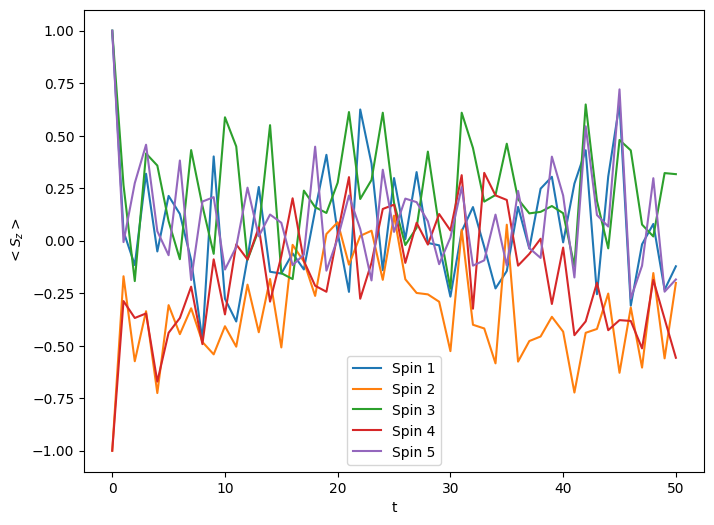

In [94]:
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(times, result.expect[i], label=f'Spin {i+1}')

plt.xlabel('t')
plt.ylabel('$<S_z>$')
plt.legend()
plt.savefig('alpha1_w1.png')
plt.show()

Exact diagonalization

It takes a long time to diagonalize the full matrix for a 10 spins chain. Hence, I use the Lanczos algorithm by specifying "sparse=Ture" and solve only for part of the total eigenvalues. Convergence test was conducted to see how many eigenstates and how many iteractions (to generate random disorder) are sufficient to characterize the MBL of a system.

In [20]:
N=10
w = 0
J = power_law(N, -2, 'linear')
W = disorder(w, N)
B = np.zeros(N)
Hamiltonian = H(J, B, W)
eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=30)
EE = 0
for k, vect in enumerate(eivect):
    EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
EE /= len(eivect)
print(EE/(0.5*(N-np.log2(np.e))))

0.2982687783236235


In [78]:
N=5
ite = 100
alpha_array = np.linspace(-5, 5, 11)
w_array = np.linspace(0, 200, 51)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(alpha_array),len(w_array)])
for i,alpha in enumerate(alpha_array):
    for j,w in enumerate(w_array):
        J = power_law(N, alpha, 'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=8)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

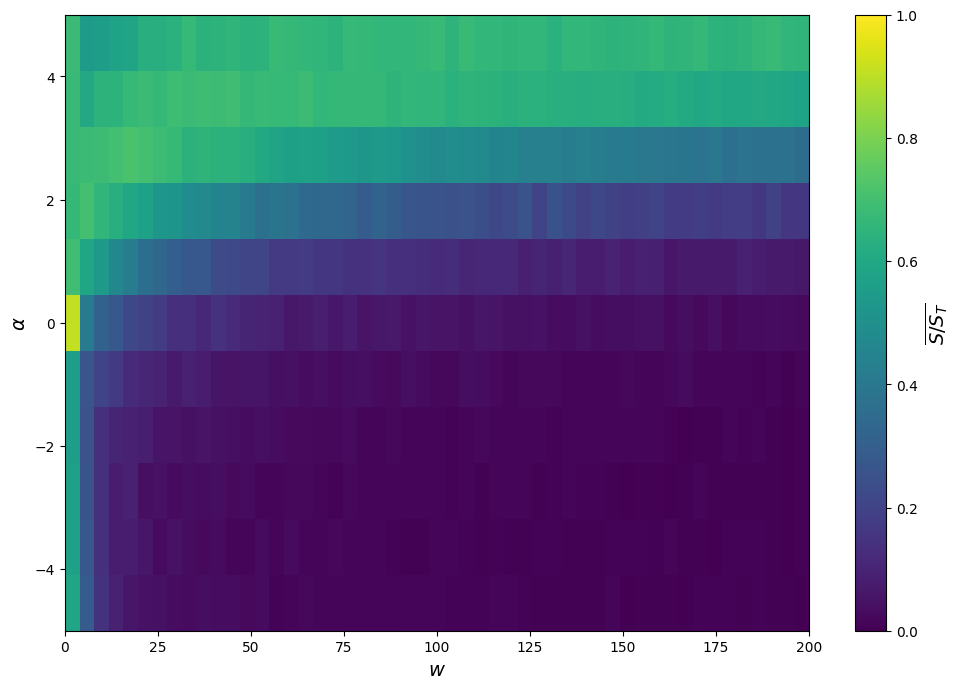

In [79]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\alpha$',fontsize=14)
#plt.savefig('powerlaw_linear_5_alleigen.png')
plt.show()

In [75]:
N=5
ite = 50
alpha_array = np.linspace(-5, 5, 11)
w_array = np.linspace(0, 200, 51)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(alpha_array),len(w_array)])
for i,alpha in enumerate(alpha_array):
    for j,w in enumerate(w_array):
        J = power_law(N, alpha, 'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates()
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

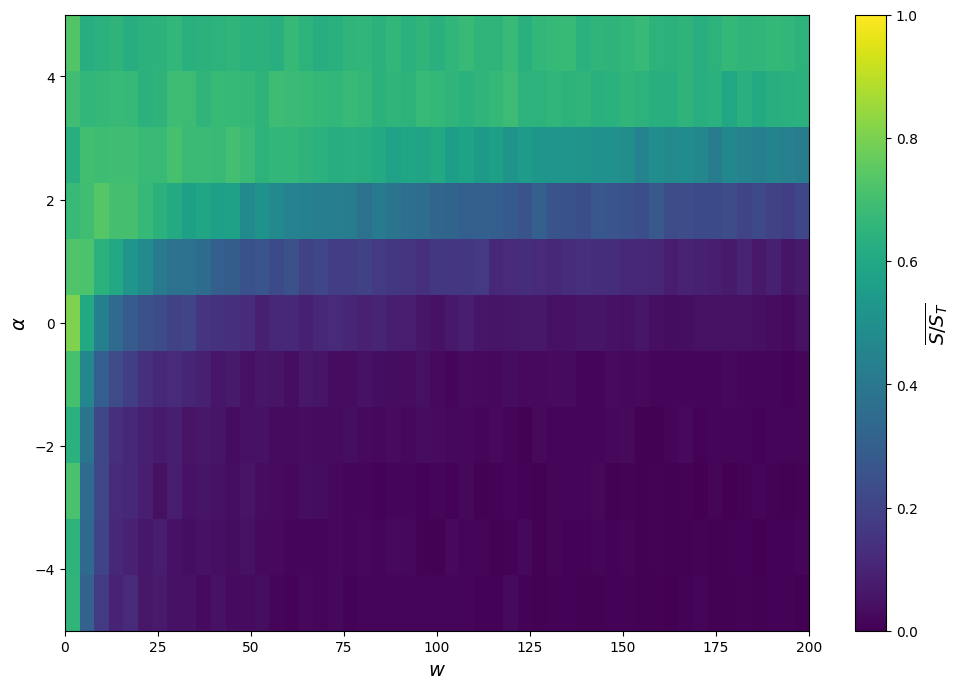

In [76]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\alpha$',fontsize=14)
#plt.savefig('powerlaw_linear_5_alleigen.png')
plt.show()

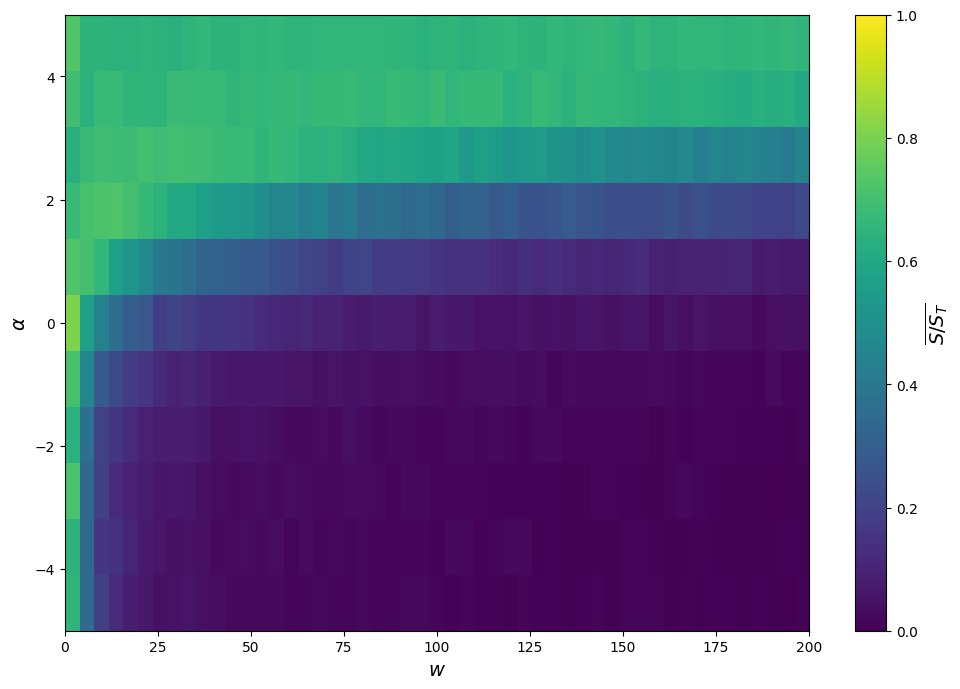

In [74]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\alpha$',fontsize=14)
plt.savefig('powerlaw_linear_5_alleigen.png')
plt.show()

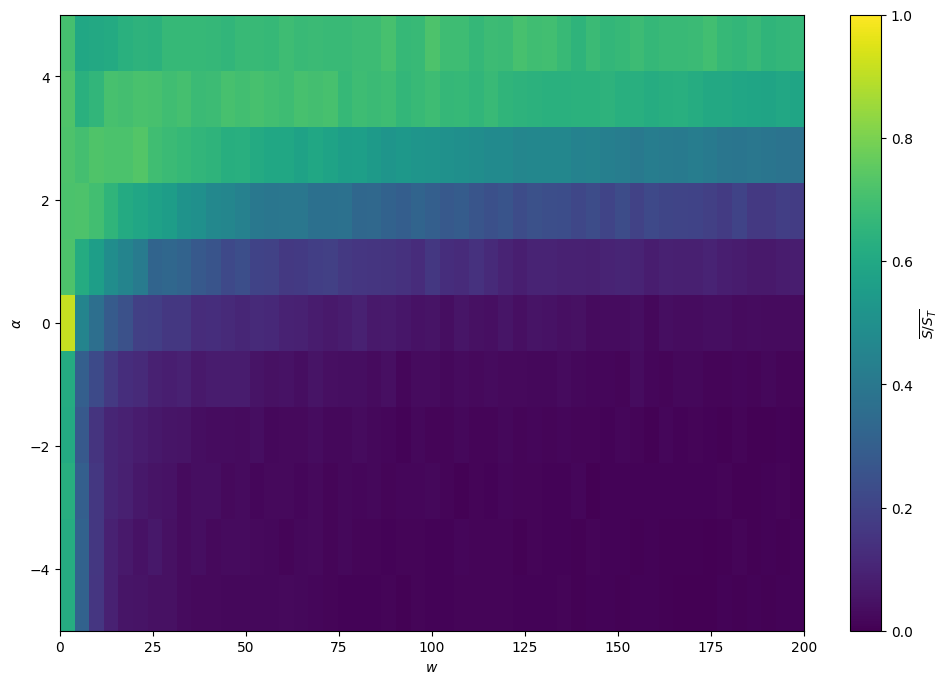

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\alpha$',fontsize=14)
plt.savefig('powerlaw_linear_5_alleigen.png')
plt.show()

In [ ]:
N=5
ite = 100
alpha_array = np.linspace(-5, 5, 11)
w_array = np.linspace(0, 200, 51)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(alpha_array),len(w_array)])
for i,alpha in enumerate(alpha_array):
    for j,w in enumerate(w_array):
        J = power_law(N, alpha, 'ring')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates()
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

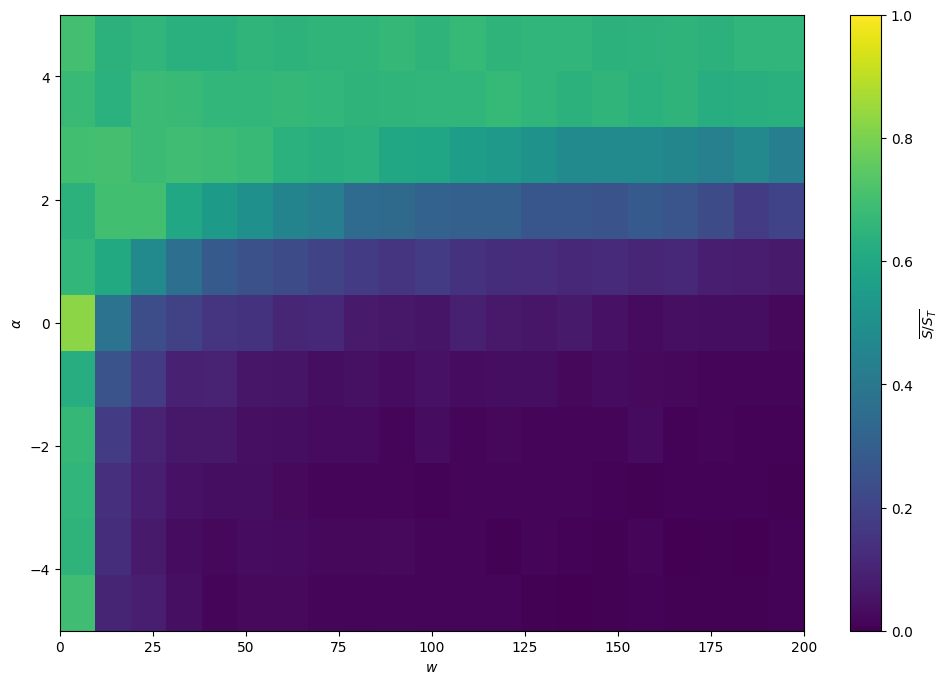

In [61]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
plt.colorbar(label=r'$\overline{S/S_T}$')
plt.xlabel(r'$w$')
plt.ylabel(r'$\alpha$')
plt.savefig('powerlaw_ring.png')
plt.show()

In [ ]:
N=5
alpha_array = np.linspace(-5, 5, 11)
w_array = np.linspace(0, 200, 51)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(alpha_array),len(w_array)])
for i,alpha in enumerate(alpha_array):
    for j,w in enumerate(w_array):
        J = power_law(N, alpha, 'linear')
        W = disorder(w, N)
        B = np.zeros(N)
        Dt = D_t(N)
        Hamiltonian = H(J, B, W)
        eivals,eivect = Hamiltonian.eigenstates()
        psi = eivect[0]
        EE = entropy_vn(psi.ptrace(list(range(N//2))),base=2)
        EE_array[i][j] = EE

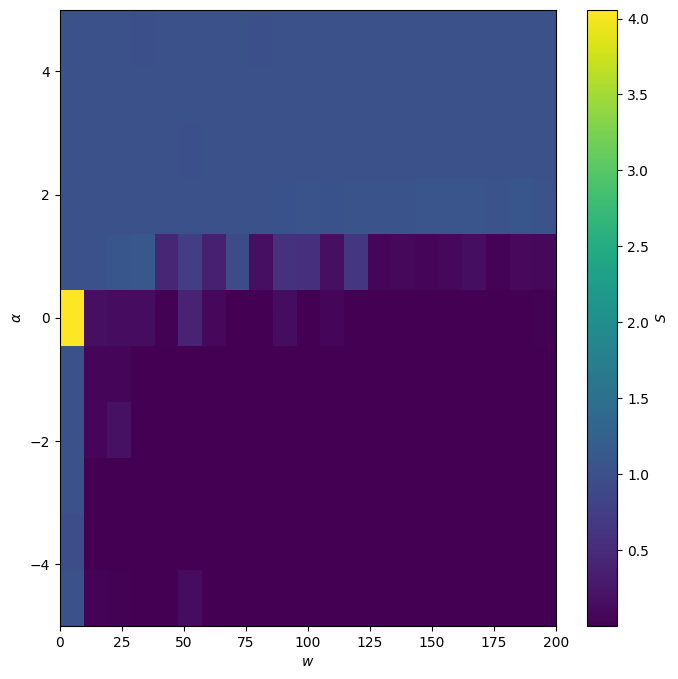

In [30]:
plt.figure(figsize=(8,8))
plt.imshow(EE_array, origin='lower',extent=[w_array[0],w_array[-1],alpha_array[0],alpha_array[-1]],cmap='viridis',aspect='auto')
plt.colorbar(label=r'$S$')
plt.xlabel(r'$w$')
plt.ylabel(r'$\alpha$')
plt.show()

In [31]:
N=5
ite = 100
n_array = np.linspace(1, N-1, N-1)
w_array = np.linspace(0, 20, 21)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(n_array),len(w_array)])
for i,n in enumerate(n_array):
    for j,w in enumerate(w_array):
        J = checkerboard(N,n,'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=20)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

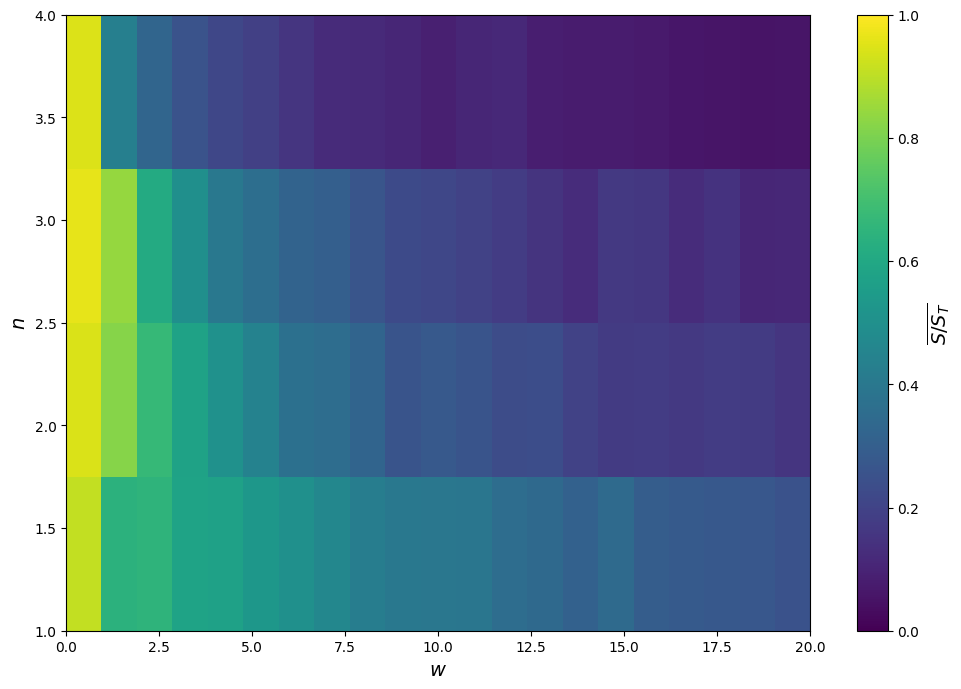

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],n_array[0],n_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$n$',fontsize=14)
plt.savefig('cboard_linear_5.png')
plt.show()

In [36]:
N=5
ite = 100
n_array = np.linspace(1, N-1, N-1)
w_array = np.linspace(0, 20, 21)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(n_array),len(w_array)])
for i,n in enumerate(n_array):
    for j,w in enumerate(w_array):
        J = checkerboard(N,n,'ring')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=20)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

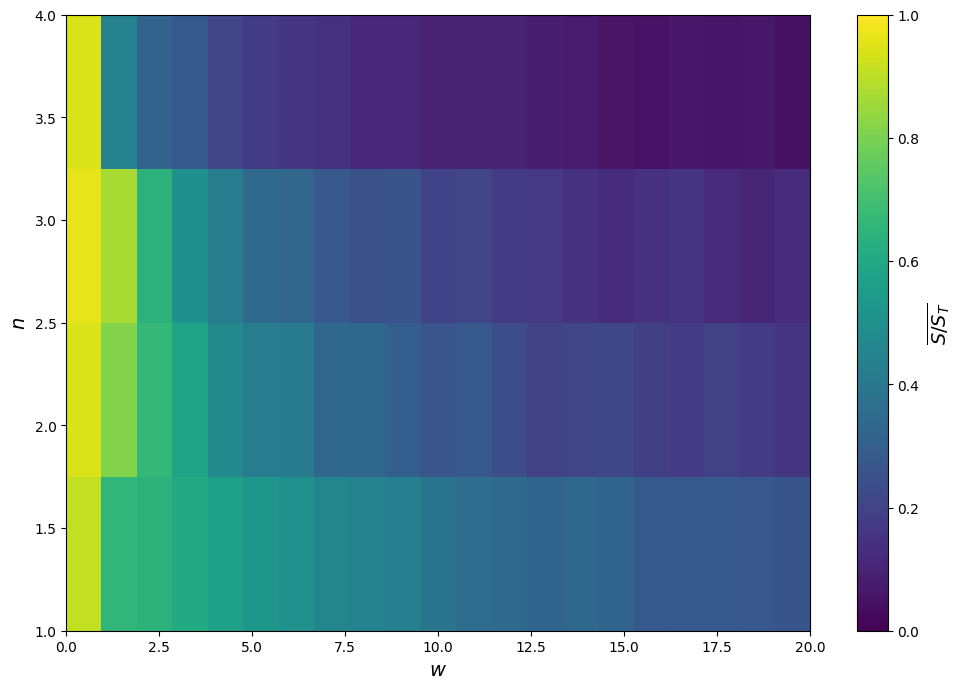

In [37]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],n_array[0],n_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$n$',fontsize=14)
plt.savefig('cboard_ring_5.png')
plt.show()

In [41]:
N=5
ite = 100
n_array = np.linspace(1, N-1, N-1)
w_array = np.linspace(0, 20, 21)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(n_array),len(w_array)])
for i,n in enumerate(n_array):
    for j,w in enumerate(w_array):
        J = neighbor(N,n,'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=5)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

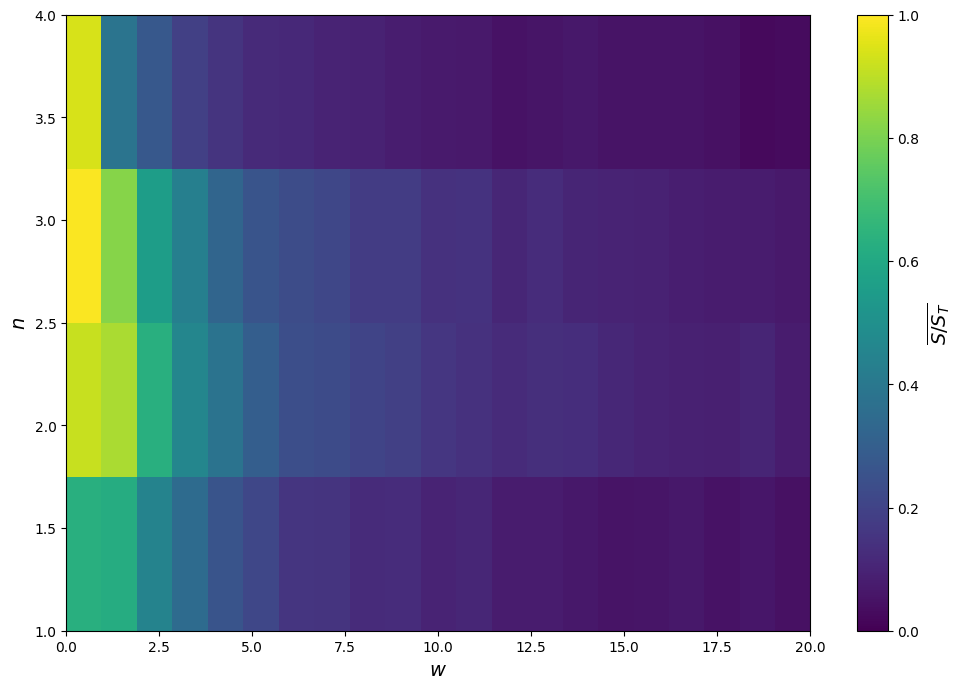

In [42]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],n_array[0],n_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$n$',fontsize=14)
plt.savefig('neighbor_linear_5.png')
plt.show()

In [44]:
N=5
ite = 100
n_array = np.linspace(1, N-1, N-1)
w_array = np.linspace(0, 20, 21)
#EE_array = np.zeros([len(w_array),len(alpha_array)])
EE_array = np.zeros([len(n_array),len(w_array)])
for i,n in enumerate(n_array):
    for j,w in enumerate(w_array):
        J = neighbor(N,n,'ring')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=3)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array[i][j] += EE
        EE_array[i][j] /= ite

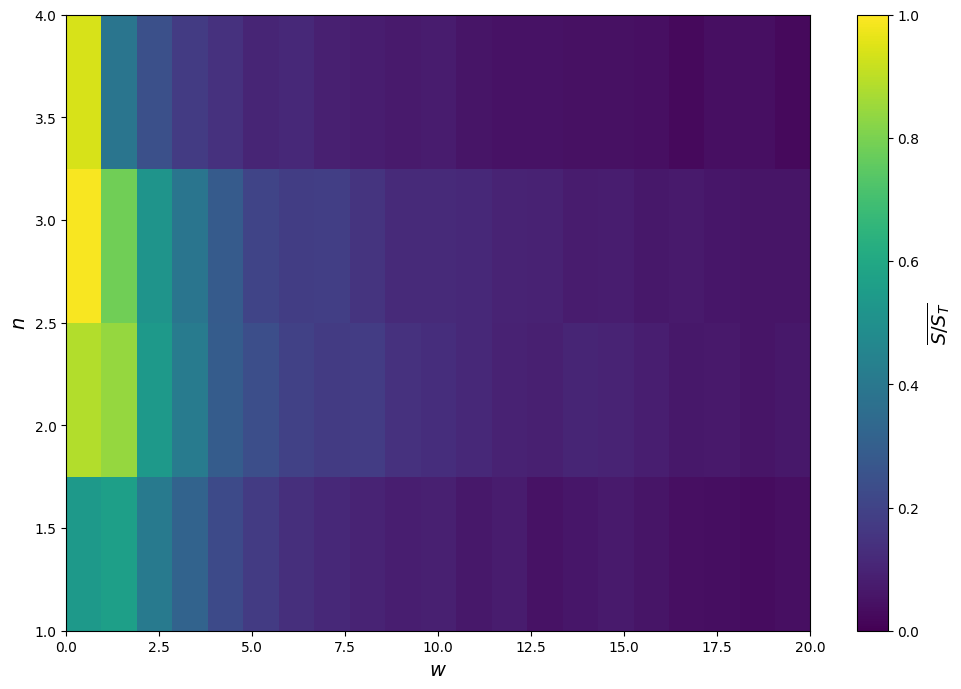

In [45]:
plt.figure(figsize=(12,8))
plt.imshow(EE_array/(0.5*(N-np.log2(np.e))), origin='lower',extent=[w_array[0],w_array[-1],n_array[0],n_array[-1]],vmin=0, vmax=1,cmap='viridis',aspect='auto')
colorbar = plt.colorbar()
colorbar.set_label(r'$\overline{S/S_T}$', fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$n$',fontsize=14)
plt.savefig('neighbor_ring_5.png')
plt.show()

In [51]:
N_array = np.linspace(2, 10, 9)
print(N_array)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [ ]:
ite = 100
#N_array = np.linspace(2, 10, 9)
N_array = np.array([4,6,8,10])
w_array = np.linspace(0, 100, 51)
EE_array1 = np.zeros([len(w_array),len(N_array)])
EE_array2 = np.zeros([len(N_array),len(w_array)])
for i,N in enumerate(N_array):
    for j,w in enumerate(w_array):
        #print(type(N))
        N = int(N)
        J = power_law(N, 1, 'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=2**N/2)
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array2[i][j] += EE
            EE_array1[j][i] += EE
        EE_array2[i][j] /= ite
        EE_array1[j][i] /= ite

Below, I study the transition with varying size of the system. However, due to the limited computational power, I fail to study systems larger than 5 accurately.

In [66]:
from matplotlib import cm

/var/folders/rz/5s46nzpd1nb4wvvvx1rhnnjm0000gn/T/ipykernel_2281/3857169630.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')  # Use the "Blues" color map


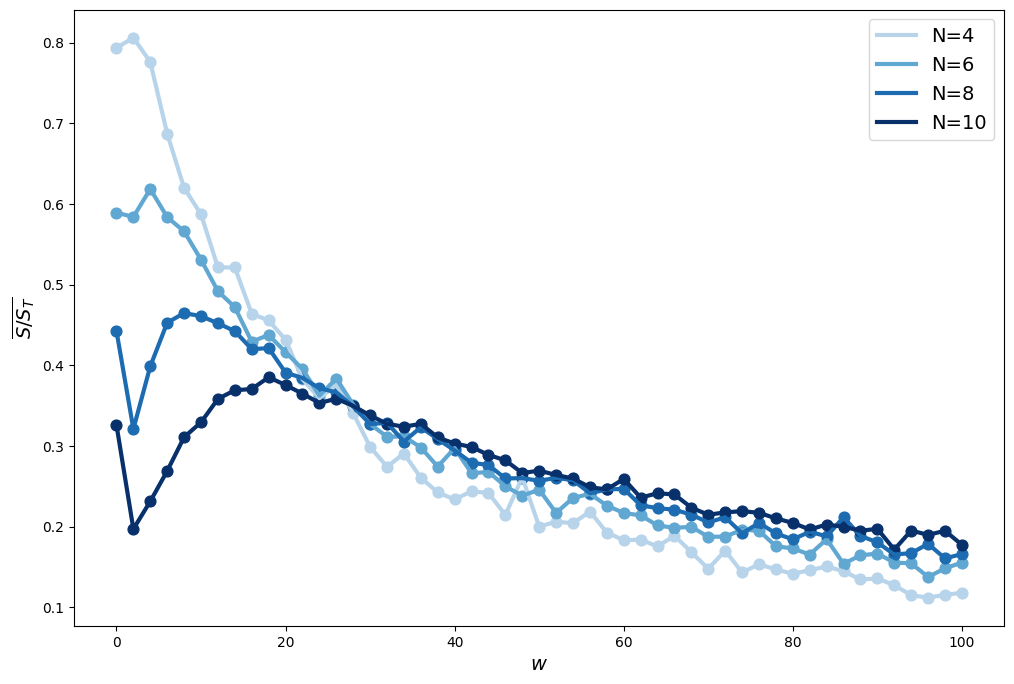

In [68]:
plt.figure(figsize=(12,8))
cmap = cm.get_cmap('Blues')  # Use the "Blues" color map
min_color_val = 0.3  # Higher value to avoid very light blue
max_color_val = 1.0  # Maximum value to keep the darkest blue
for i,N in enumerate(N_array):
    if N%2 == 0 and N>2:
        # Generate a unique color for the line and scatter plot
        #color = next(plt.gca()._get_lines.prop_cycler)['color']
        norm_index = min_color_val + (i / (len(N_array) - 1)) * (max_color_val - min_color_val)
        color = cmap(norm_index)  # Get color from colormap
        plt.plot(w_array,EE_array2[i]/(0.5*(N-np.log2(np.e))),label=f'N={N}', linewidth=3, color=color)
        plt.scatter(w_array,EE_array2[i]/(0.5*(N-np.log2(np.e))), s=60,color=color)
plt.legend(fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\overline{S/S_T}$',fontsize=14)
plt.savefig('power_N_even.png')
plt.show()


In [71]:
ite = 100
#N_array = np.linspace(2, 10, 9)
N_array = np.array([4,6,8,10])
w_array = np.linspace(0, 100, 21)
EE_array1 = np.zeros([len(w_array),len(N_array)])
EE_array2 = np.zeros([len(N_array),len(w_array)])
for i,N in enumerate(N_array):
    for j,w in enumerate(w_array):
        #print(type(N))
        N = int(N)
        J = power_law(N, 1, 'linear')
        for l in range(ite):
            W = disorder(w, N)
            B = np.zeros(N)
            Hamiltonian = H(J, B, W)
            eivals,eivect = Hamiltonian.eigenstates(sparse=True,eigvals=int(2**N/4))
            EE = 0
            for k, vect in enumerate(eivect):
                EE += entropy_vn(vect.ptrace(list(range(N//2))),base=2)
            EE /= len(eivect)
            EE_array2[i][j] += EE
            EE_array1[j][i] += EE
        EE_array2[i][j] /= ite
        EE_array1[j][i] /= ite

/var/folders/rz/5s46nzpd1nb4wvvvx1rhnnjm0000gn/T/ipykernel_2281/3917202796.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')  # Use the "Blues" color map


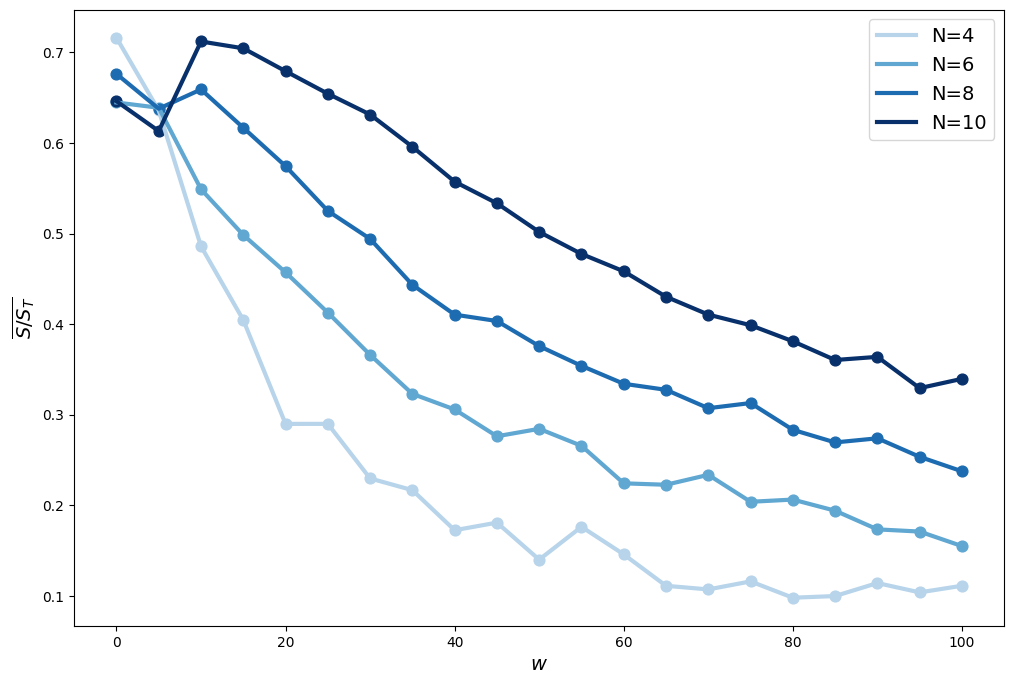

In [72]:
plt.figure(figsize=(12,8))
cmap = cm.get_cmap('Blues')  # Use the "Blues" color map
min_color_val = 0.3  # Higher value to avoid very light blue
max_color_val = 1.0  # Maximum value to keep the darkest blue
for i,N in enumerate(N_array):
    if N%2 == 0 and N>2:
        # Generate a unique color for the line and scatter plot
        #color = next(plt.gca()._get_lines.prop_cycler)['color']
        norm_index = min_color_val + (i / (len(N_array) - 1)) * (max_color_val - min_color_val)
        color = cmap(norm_index)  # Get color from colormap
        plt.plot(w_array,EE_array2[i]/(0.5*(N-np.log2(np.e))),label=f'N={N}', linewidth=3, color=color)
        plt.scatter(w_array,EE_array2[i]/(0.5*(N-np.log2(np.e))), s=60,color=color)
plt.legend(fontsize=14)
plt.xlabel(r'$w$',fontsize=14)
plt.ylabel(r'$\overline{S/S_T}$',fontsize=14)
plt.savefig('power_N_even2.png')
plt.show()
